<h2><center>Week 2 - Assignment</center></h2>
<h3><center>Programming for Data Science 2024</center></h3>

Exercises for the topics covered in the second lecture.

**Important**: You will need sounddevice, numpy, scipy and matplotlib. To install these, run *pip install sounddevice numpy scipy matplotlib* in the terminal, or *!pip install sounddevice numpy scipy matplotlib* in Jupyter. You will also need the data in the *data* folder.

The exercise will be marked as passed if you get **at least 10/15** points.

Exercises must be handed in via **ILIAS** (Homework assignments). Deliver your submission as a compressed file (zip) containing one .py or .ipynb file with all exercises. The name of both the .zip and the .py/.ipynb file must be *SurnameName* of the two members of the group. Example: Riccardo Cusinato + Athina Tzovara = *CusinatoRiccardo_TzovaraAthina.zip* .

It's important to use comments to explain your code and show that you're able to take ownership of the exercises and discuss them.

You are not expected to collaborate outside of the group on exercises and submitting other groups’ code as your own will result in 0 points.

For questions contact: *riccardo.cusinato@unibe.ch* with the subject: *Programming for Data Science 2024*.

**Deadline: 14:00, March 7, 2024.**

<h3 style="text-align:left;">Exercise 1 - Audio signal<span style="float: right">5 points</span></h3>

In this exercise you'll work with continuous audio signals. First we load and plot the audio signals:

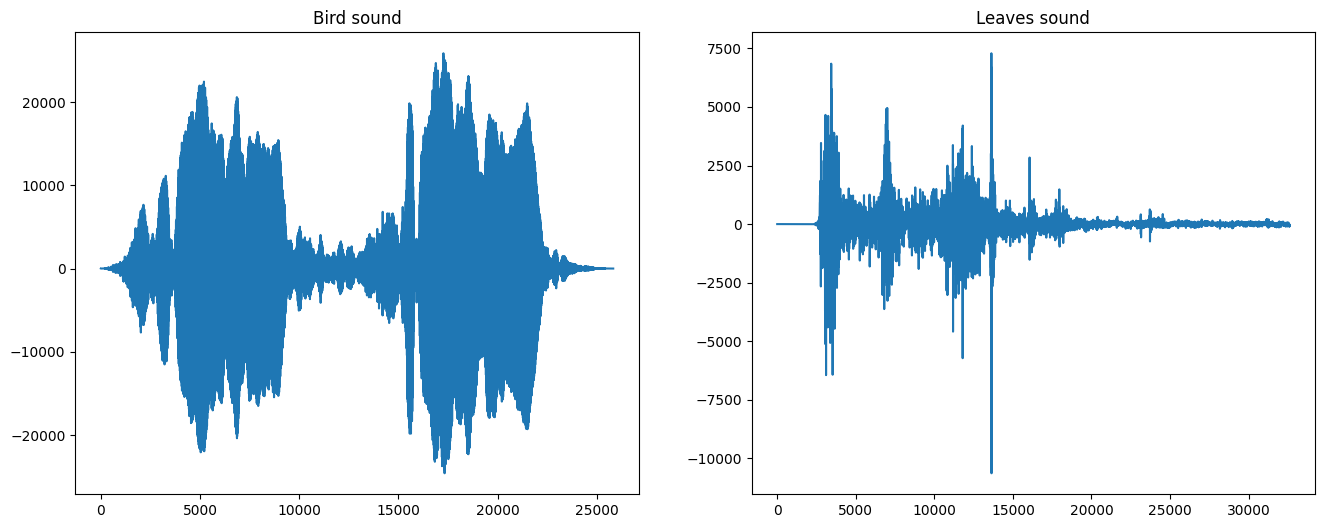

In [27]:
# Import dependencies
import time
import matplotlib.pyplot as plt
import sounddevice as sd
from scipy.io.wavfile import read
import numpy as np

fs_bird, sound_bird = read('./data/bird.wav')
fs_leaves, sound_leaves = read('./data/leaves.wav')

# Plot sounds in different subplots
plt.figure(figsize=(16,6))
plt.subplot(1, 2, 1)
plt.plot(sound_bird)
plt.title("Bird sound")
plt.subplot(1, 2, 2)
plt.plot(sound_leaves)
plt.title("Leaves sound")
plt.show()

# Play sounds
time.sleep(1)
sd.play(sound_bird, fs_bird)
time.sleep(1)
sd.play(sound_leaves, fs_leaves)
time.sleep(1)

1. Double the amplitude of the second audio signal (leaves) using *numpy*. Then plot the amplified signal using *matplotlib*. (*1 point*)

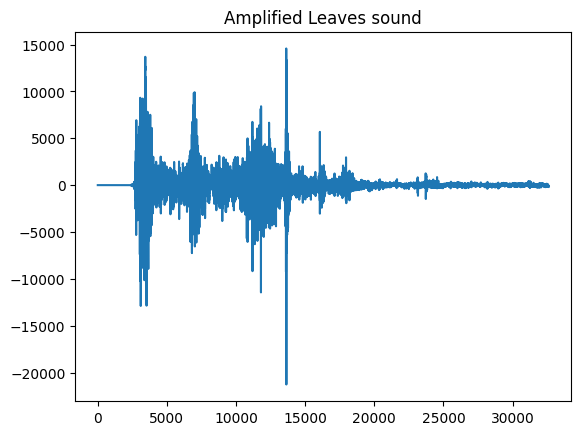

In [28]:
###
# doubled the amplitude of the audio signal
amplified_sound_leaves= np.multiply(sound_leaves, 2)
#plot the amplified audio signal leaves

plt.plot(amplified_sound_leaves)
#Give a title for the plot
plt.title("Amplified Leaves sound")
#show the plot
plt.show()
###

2. The two sounds don't have the same length (number of samples). Print the length of the two sounds and create a new leaves sound as long as the birds sound. Print again the lenghts to make sure they match. (Use the amplified leaves sound previously created). (*1 point*)

In [29]:
###
#length of the sound
bird_length = len(sound_bird)
leaves_amplified_length= len(amplified_sound_leaves)

print("Bird sound length:", bird_length )
print("Amplified leave sound length:", leaves_amplified_length)

#new leave sound with the length of bird_length

new_leave_sound_cut= amplified_sound_leaves[:bird_length]

#print the length of new_leave_sound_length and bird_length. They should both have the same length

print("Bird sound length", bird_length)
print("new_leave_sound_length:", len(new_leave_sound_cut))



###

Bird sound length: 25824
Amplified leave sound length: 32612
Bird sound length 25824
new_leave_sound_length: 25824


3. Create a silence period (0 amplitude) of the same duration of the two sounds, using *numpy*. (*1 point*)

In [30]:
###
silence_period= np.zeros(bird_length)
###

4. Finally, concatenate the diffent sounds into one. The order should be: silence, birds, silence, leaves, silence (use the amplified and cut leaves sound). Use *numpy* and plot the results. (*2 points*)

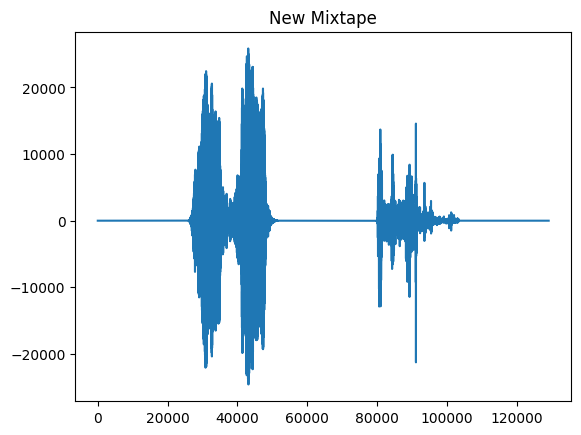

In [31]:
###
combined_sound= np.concatenate([silence_period, sound_bird, silence_period, new_leave_sound_cut, silence_period])
#plot the new comined_sound

plt.plot(combined_sound)

#Giving a name for the plot

plt.title("New Mixtape")
plt.show()

###

<h3 style="text-align:left;">Exercise 2 - Image data<span style="float: right">7 points</span></h3>

In this exercise, you'll work with an image, i.e. an n-dimensional matrix data. First, we load and plot the image:

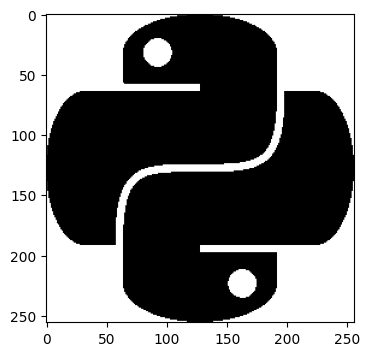

In [43]:
import matplotlib.pyplot as plt
import numpy as np

im = plt.imread('./data/python.bmp')
im = np.array(im)

plt.figure(figsize=(4, 4))
plt.imshow(im)
plt.show()

The image is a 3-dimensional array, where the 1st and 2nd dimensions represent positions on the Y (rows) and X (columns) axes and the 3rd saturation values between 0 and 255 for that specific position, as [red, green, blue].

1. Set the pixels on the 50th to 60th row and and 200th to 210th column to green, and displays the resultant image. The data-type of the array should be an 8-bit unsigned integer. (*1 point*)

**NB!** 
- From the 50th row, up to and including the 60th; From the 200th column, up to and including the 210th.
- Keep in mind that the first dimension is related to the usual Y axis, and the second dimension to the usual X axis.

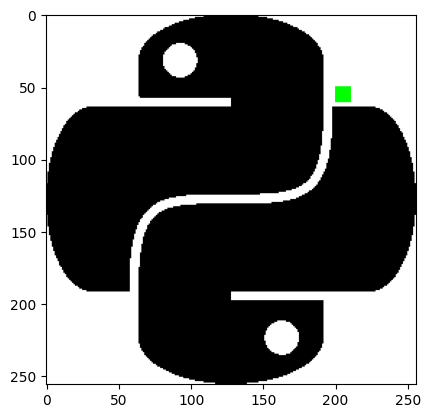

In [44]:
###

im[50:61, 200:211]=[0, 255, 0] #to include 60 and 210 we have to take 61 and 211
plt.imshow(im)
plt.show()
###

2. The image created in point 1 will be the one you use in the rest of the exercise. Make a copy of the top half of the image, flip it along the 2nd axis using the appropriate numpy method, and plot the result. (*1 point*)

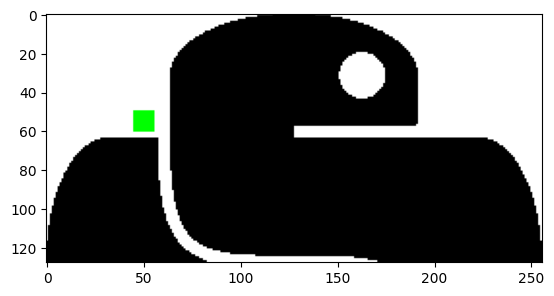

In [45]:
###

half_index_rows= im.shape[0]//2 #floor division

#skicing the array so that i only get the tophalf
top_half=im[:half_index_rows, :, :]
#flipping the top_half array around the 2nd axis
flipped_top_half= np.flip(top_half, axis=1)

plt.imshow(flipped_top_half)
plt.show()

###

3. Make a copy of the bottom half of your image, combine it together with the first half you flipped in point 2, and display the result. Also plot your original image and check whether it has changed. (*1 point*)

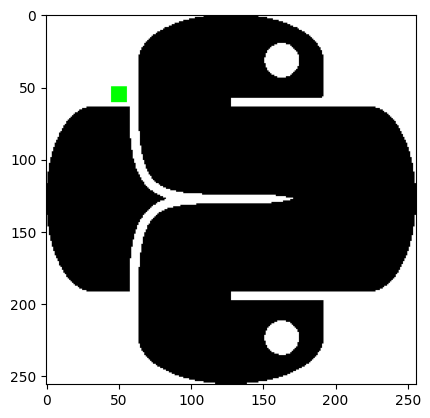

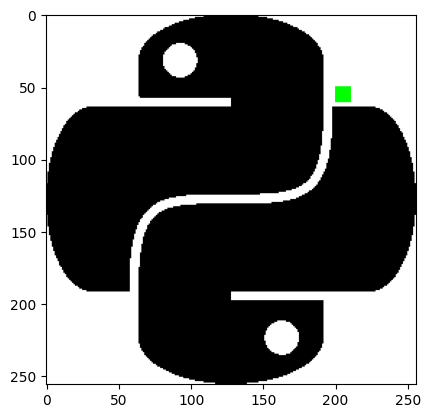

In [49]:
###
#slicing the array so that i get the bottom half
bottom_half= im[half_index_rows: , : , :]
#Combining the flipped top half and bottom half to one picture
flipped_top= np.concatenate([flipped_top_half, bottom_half])
plt.imshow(flipped_top)
plt.show()

plt.imshow(im) #the original picture shouldn't change
plt.show()
###

4. Make a shallow copy (view) of the top half of your image. Change every black pixel ([0, 0, 0]) to a green pixel ([0, 255, 0]). Plot the resulting colored top part, together with the base of your shallow copy and also the original image. (*2 points*)

**Hint**: to test that a consition holds for multiple elements use the *numpy.all* function.

In [70]:
###
top_half_view=top_half.view()
top_half_view[:, :, 1]+=255
top_half_view[:, :, 1]%=256

modified_image=np.concatenate([top_half_view, bottom_half])
plt.imshow(modified_image)
plt.show()
plt.imshow(im)
plt.show()


###

UFuncTypeError: Cannot cast ufunc 'remainder' output from dtype('int16') to dtype('uint8') with casting rule 'same_kind'

5. In point 3, your original image should not have changed, while in point 4, the original image should show the same change as when plotting the base of your shallow copy. Give a brief explanation of why the original image changed in one instance, and not in the other. (*2 points*)

In [ ]:
###
# YOUR ANSWER HERE
###

<h3 style="text-align:left;">Exercise 3 - Tabular data<span style="float: right">3 points</span></h3>

In the following you'll work with tabular data, i.e. data related to multiple observations. The dataset consists of synthetic data on monthly average precipitations in 4 different countries: Switzerland, Italy, France and Germany. Let's first load the dataset and assign the variables:

In [34]:
import numpy as np

precip = np.load("./data/precip.npy", allow_pickle=True)

precip[:, 0]  # 12 data points for Switzerland (one per month)
precip[:, 1]  # 12 data points for Italy (one per month)
precip[:, 2]  # 12 data points for France (one per month)
precip[:, 3]  # 12 data points for Germany (one per month)

array([1.19, 1.23, 2.37, 3.37, 3.55, 2.5 , 2.36, 2.17, 2.38, 1.78, 1.79,
       1.24])

1. Use built-in numpy methods to obtain an array with the maximum precipitation for each country, and the average precipitation *across* the five countries for each month. (*1 point*)

In [38]:
###
#use np.max() along the axis=0 to get the maximum precipitation for each country
print("Maximum precipitation for each country:", np.max(precip, axis=0) )
#use np.mean() along the axis=1 to calculate the average precipitation across the five countries for each month

print("average precipitation across the five countries for each month", np.mean(precip, axis=1))
###

Maximum precipitation for each country: [3.05 2.56 2.89 3.55]
average precipitation across the five countries for each month [0.7    0.745  1.855  2.8875 2.99   1.965  1.905  1.64   1.85   1.3
 1.3775 0.82  ]


2. Obtain the maximum precipitation of the entire dataset. Next, use a numpy method to find out at which row and column in the dataset you would find this maximum precipitation at. (*2 points*)

In [42]:
###
#print the maximum precipitation of the entire datset
max= np.max(precip)

#find the row and column indices of the maximum precipitation value using np.unravel_index method
# Note that np.argmax returns the index of the maximum value in the flattened 1D version of the precip array
print(f" {max=}, row and column of max: {np.unravel_index(np.argmax(precip), precip.shape)}")
###

 max=3.55, row and column of max: (4, 3)
